In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
all_df = pd.DataFrame()

for trait in ['aggression','hate','sarcasm','humor','stance']:
    df = pd.read_csv('../results/hyper_search_{}.csv'.format(trait))
    df = df.sort_values(['weighted_f1'],ascending=[False])
    df = df.drop_duplicates(subset=['config'])
    df['config'] = df.config.apply(eval)
    df = pd.concat([df[['weighted_f1', 'macro_f1']], df.config.apply(pd.Series)], axis=1)
    df['data'] = trait
    
    all_df = pd.concat([all_df,df],axis=0)
    
    df = pd.read_csv('../results/results_{}_detection.csv'.format(trait))
    df = df.sort_values(['weighted_f1'],ascending=[False])
    df = df.drop_duplicates(subset=['config'])
    df['config'] = df.config.apply(eval)
    df = pd.concat([df[['weighted_f1', 'macro_f1']], df.config.apply(pd.Series)], axis=1)
    df['data'] = trait
    
    df[df.use_features == False]
    
    all_df = pd.concat([all_df,df],axis=0)

In [29]:
all_df.head()

,weighted_f1,macro_f1,text_max_len,char_max_len,word_char_max_len,n_units,emb_dim,n_layers,epochs,learning_rate,model_name,loss,use_features,data
2,0.890868,0.891078,40,100,20,128,128,2,500,0.001,Transformer,ce,False,aggression
3,0.888383,0.887396,40,200,20,128,128,2,500,0.001,Transformer,ce,False,aggression
4,0.882096,0.881461,10,100,20,128,128,2,500,0.001,WLSTM,ce,False,aggression
1,0.882026,0.880628,40,50,20,128,128,2,500,0.001,Transformer,ce,False,aggression
0,0.880833,0.879066,40,25,20,128,128,2,500,0.001,Transformer,ce,False,aggression


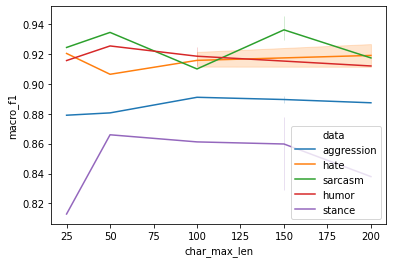

In [30]:
sns.lineplot(data=all_df[all_df.model_name == 'Transformer'],x="char_max_len", y="macro_f1", hue="data")
plt.show()

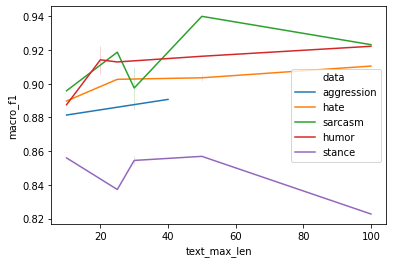

In [31]:
sns.lineplot(data=all_df[all_df.model_name == 'WLSTM'],x="text_max_len", y="macro_f1", hue="data")
plt.show()

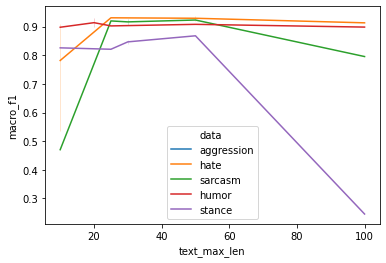

In [32]:
sns.lineplot(data=all_df[all_df.model_name == 'HAN'],x="text_max_len", y="macro_f1", hue="data")
plt.show()

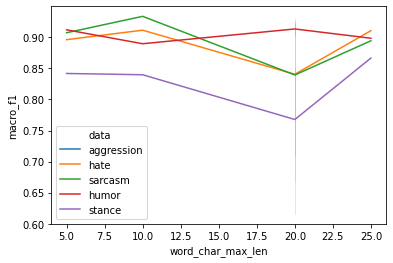

In [33]:
sns.lineplot(data=all_df[all_df.model_name == 'HAN'],x="word_char_max_len", y="macro_f1", hue="data")
plt.show()

In [27]:
all_df[all_df.model_name == 'HAN']

,weighted_f1,macro_f1,text_max_len,char_max_len,word_char_max_len,n_units,emb_dim,n_layers,epochs,learning_rate,model_name,loss,use_features,data
1,0.903378,0.903198,40,150,20,128,128,2,500,0.001,HAN,ce,False,aggression
4,0.911074,0.895980,10,100,5,128,128,2,500,0.001,HAN,ce,False,hate
5,0.924088,0.911202,10,100,10,128,128,2,500,0.001,HAN,ce,False,hate
6,0.922627,0.910471,10,100,25,128,128,2,500,0.001,HAN,ce,False,hate
7,0.569059,0.409794,10,100,20,128,128,2,500,0.001,HAN,ce,False,hate
8,0.941221,0.930970,25,100,20,128,128,2,500,0.001,HAN,ce,False,hate
9,0.945575,0.936083,50,100,20,128,128,2,500,0.001,HAN,ce,False,hate
10,0.924942,0.913405,100,100,20,128,128,2,500,0.001,HAN,ce,False,hate
3,0.941107,0.930697,50,200,20,128,128,2,500,0.001,HAN,focal,False,hate
7,0.932763,0.921351,50,200,20,128,128,2,500,0.001,HAN,ce,False,hate


In [19]:
all_df.use_features.iloc[0]

False